# WeatherPy

---
Starter Code to Generate Random Geographic Coordinates and a List of Cities

Adapted by Molly Ingram

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [101]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
np.random.seed(42)      #setting seed to ensure consistent random results
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")    
#It's surprising to me that 1500 random coordinates all over the globe only seems to generate 500-600 unique cities, 
    #would be something to look into if truly wanted to model global weather

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [102]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"  #url for weather specific search with api key included

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping {city}...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | walvis bay
Processing Record 2 of Set 1 | olonkinbyen


Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | saint-francois
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | sandnessjoen
Processing Record 8 of Set 1 | tokar
Processing Record 9 of Set 1 | laojunmiao
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | tolanaro
Processing Record 16 of Set 1 | colonia
Processing Record 17 of Set 1 | puerto baquerizo moreno
Processing Record 18 of Set 1 | ulladulla
Processing Record 19 of Set 1 | ocean pointe
City not found. Skipping ocean pointe...
Processing Record 20 of Set 1 | invercargill
Processing Record 21 of Set 1 | punta del este
Processing Record 22 of Set 1 | afaahiti
Processing Record 23 of Set 1 | jamestown
Processing Record 24 of Set 1 | thunder bay
Processing Reco

In [103]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [104]:
# Display sample data
city_data_df.head()

#Converting Temp to Celsius
city_data_df['Max Temp'] = city_data_df['Max Temp'] - 273.15

#Converting Unix to datetime date
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'],unit='s').dt.date

city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,walvis bay,-22.9575,14.5053,22.53,78,98,0.51,NA,2024-02-06
1,olonkinbyen,70.9221,-8.7187,-1.24,89,76,8.55,SJ,2024-02-06
2,bethel,41.3712,-73.4140,5.11,50,0,2.57,US,2024-02-06
3,saint-francois,46.4154,3.9054,7.58,88,100,2.57,FR,2024-02-06
4,grytviken,-54.2811,-36.5092,13.01,42,75,5.19,GS,2024-02-06


In [105]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [106]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
    #For some reason in the conversion to a csv some country codes are getting messed up
    #City ID 0 was NA for Namibia but is now NaN, would need to fix

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,22.53,78,98,0.51,NaN,2024-02-06
1,olonkinbyen,70.9221,-8.7187,-1.24,89,76,8.55,SJ,2024-02-06
2,bethel,41.3712,-73.4140,5.11,50,0,2.57,US,2024-02-06
3,saint-francois,46.4154,3.9054,7.58,88,100,2.57,FR,2024-02-06
4,grytviken,-54.2811,-36.5092,13.01,42,75,5.19,GS,2024-02-06


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

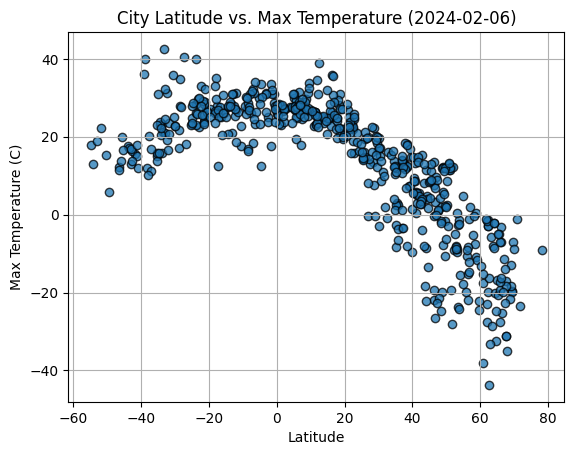

In [107]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-02-06)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

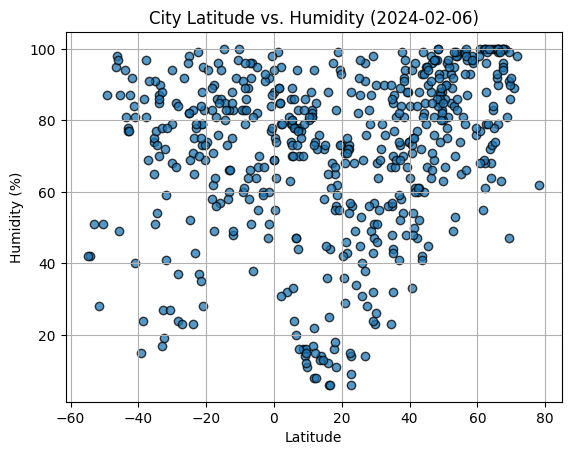

In [108]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-02-06)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

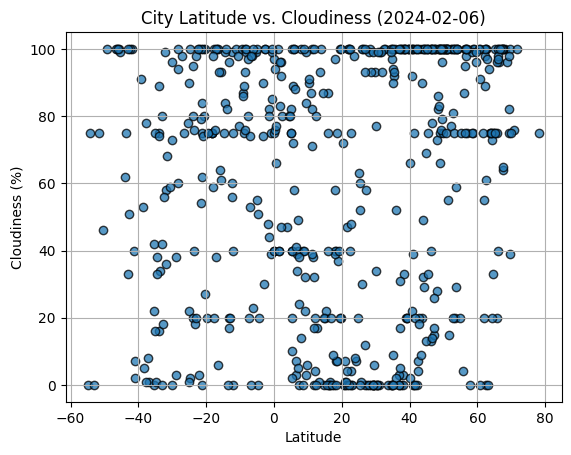

In [109]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-02-06)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

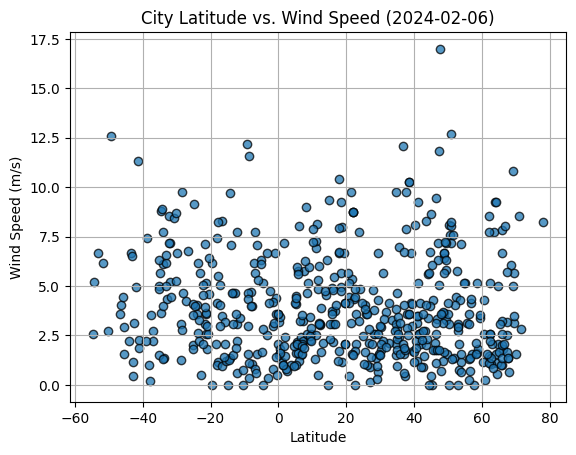

In [110]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-02-06)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [111]:
# Define a function to create Linear Regression plots
def linreg_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    f, ax = plt.subplots()
    ax.scatter(x,y)
    ax.plot(x, regress_values, 'red')
    
    return ax, line_eq, rvalue

    

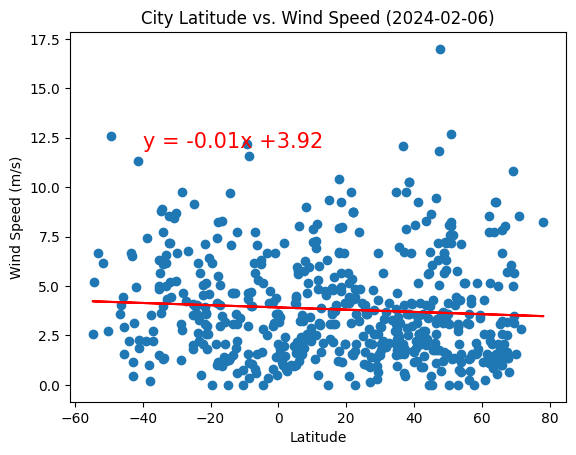

R-value: -0.06910767505408674


In [112]:
ax, line_eq, rvalue =linreg_plot(city_data_df['Lat'], city_data_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq,(-40,12),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Speed (2024-02-06)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()
print(f"R-value: {rvalue}")

In [113]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,olonkinbyen,70.9221,-8.7187,-1.24,89,76,8.55,SJ,2024-02-06
2,bethel,41.3712,-73.4140,5.11,50,0,2.57,US,2024-02-06
3,saint-francois,46.4154,3.9054,7.58,88,100,2.57,FR,2024-02-06
6,sandnessjoen,66.0217,12.6316,-6.94,79,40,6.69,NO,2024-02-06
7,tokar,18.4254,37.7290,22.12,56,7,4.96,SD,2024-02-06


In [114]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,walvis bay,-22.9575,14.5053,22.53,78,98,0.51,NaN,2024-02-06
4,grytviken,-54.2811,-36.5092,13.01,42,75,5.19,GS,2024-02-06
5,port elizabeth,-33.9180,25.5701,23.39,87,75,7.72,ZA,2024-02-06
12,waitangi,-43.9535,-176.5597,17.68,94,62,2.24,NZ,2024-02-06
13,puerto natales,-51.7236,-72.4875,22.25,28,75,6.17,CL,2024-02-06


###  Temperature vs. Latitude Linear Regression Plot

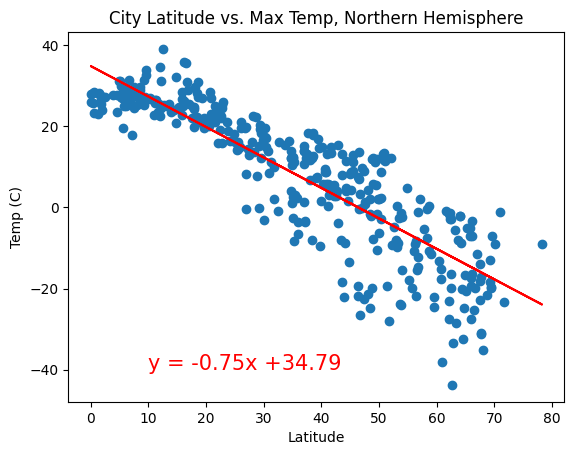

R-value: -0.8712246258286336


In [115]:
# Linear regression on Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
ax.plot()
plt.annotate(line_eq,(10,-40),fontsize=15,color="red")
plt.title('City Latitude vs. Max Temp, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temp (C)')
plt.show()
print(f"R-value: {rvalue}")

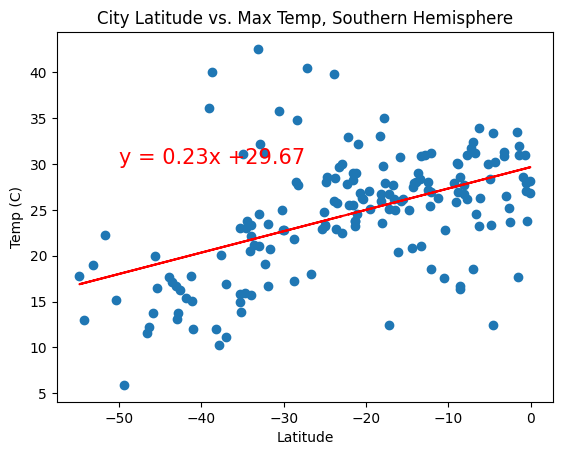

R-value: 0.49157839447316537


In [116]:
# Linear regression on Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
ax.plot()
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title('City Latitude vs. Max Temp, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temp (C)')
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** The relationship between latitude and temperature is much stronger in the northern than southern hemishpere, as seen in the tightness of the scatterplot points and will as the R squared values. However the trend is the same for both; the further from the equator, the colder the temperature.

### Humidity vs. Latitude Linear Regression Plot

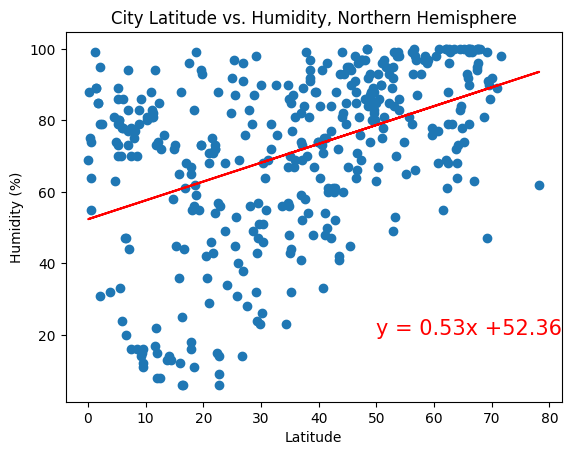

R-value: 0.43427267697268057


In [117]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
ax.plot()
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title('City Latitude vs. Humidity, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
print(f"R-value: {rvalue}")

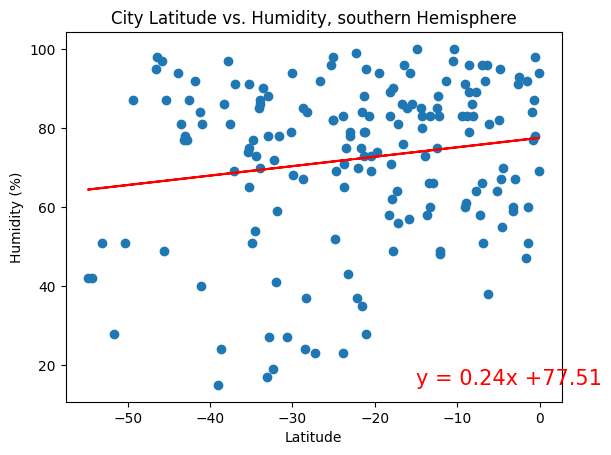

R-value: 0.16302382073786767


In [118]:
# Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
ax.plot()
plt.annotate(line_eq,(-15,15),fontsize=15,color="red")
plt.title('City Latitude vs. Humidity, southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** The relationship between latitude and humidity appears stronger in the northern hemisphere based on the R value, but I'm not convinenced a linear regression is the best way to model this. I think using a 2nd order polynomial would be better if not trying a nonparametric regression.

### Cloudiness vs. Latitude Linear Regression Plot

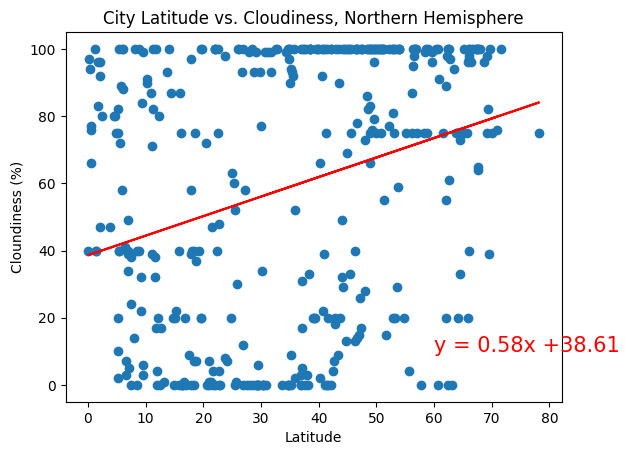

R-value: 0.29423161921886914


In [119]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
ax.plot()
plt.annotate(line_eq,(60,10),fontsize=15,color="red")
plt.title('City Latitude vs. Cloudiness, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloundiness (%)')
plt.show()
print(f"R-value: {rvalue}")

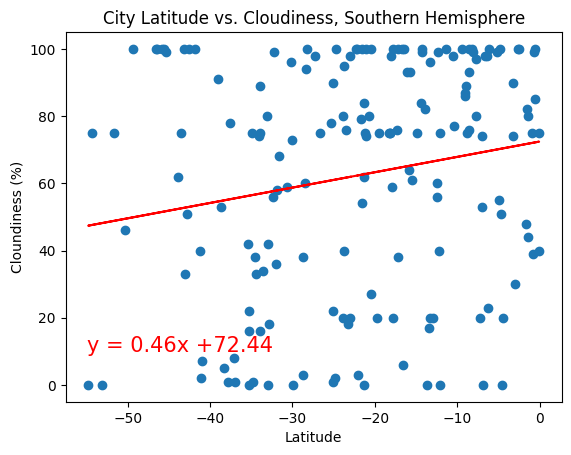

R-value: 0.18348849993369107


In [120]:
# Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
ax.plot()
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.title('City Latitude vs. Cloudiness, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloundiness (%)')
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** The relationship between latitude and cloud cover is not very strong, but it is surprisingly similar for both hemishperes. The regressions indicate a one degree latitude change is related to roughly 0.5% change in cloud cover on average.

### Wind Speed vs. Latitude Linear Regression Plot

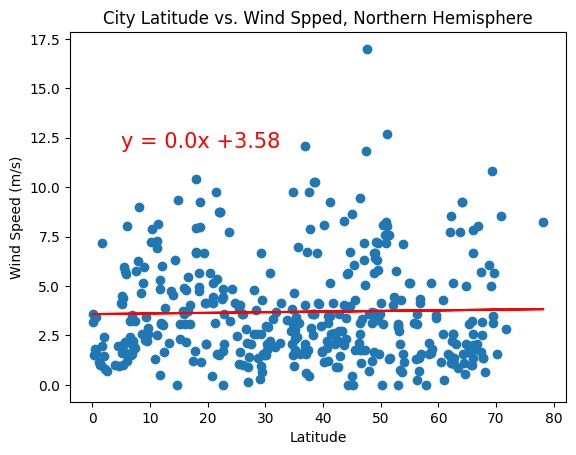

R-value: 0.02436250569953371


In [121]:
# Northern Hemisphere
ax, line_eq, rvalue =linreg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq,(5,12),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Spped, Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()
print(f"R-value: {rvalue}")

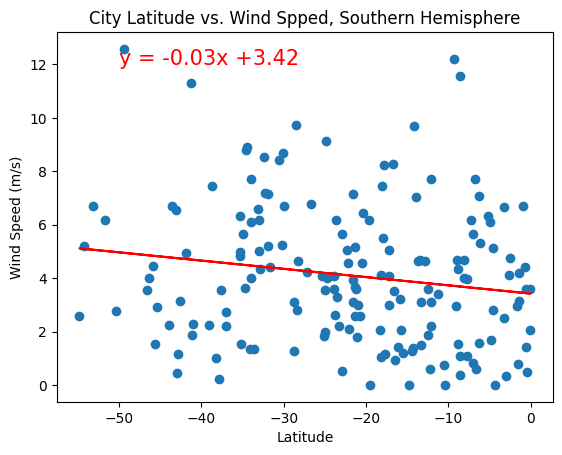

R-value: -0.16298810259905788


In [122]:
# Southern Hemisphere
ax, line_eq, rvalue =linreg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
ax.plot()
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.title('City Latitude vs. Wind Spped, Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()
print(f"R-value: {rvalue}")

**Discussion about the linear relationship:** There is essentially no (linear) relationship between latitude and wind speed. For both hemisphere the slope coefficients and r-values are near zero.